<a href="https://colab.research.google.com/github/samp3209/datamining/blob/main/Enron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(Unnamed: 0    0
 file          0
 message       0
 date          0
 subject       0
 X-Folder      0
 X-From        0
 X-To          0
 body          0
 employee      0
 dtype: int64, (94592, 10))

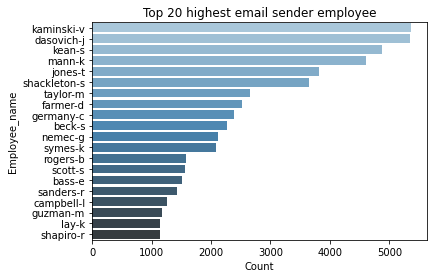

In [74]:
# -*- coding: utf-8 -*-
"""Cleaning Enron Data Set

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/gist/ChamplainBrent/2e96a148a8bfdcfb1ba57a89ea30b958/cleaning-enron-data-set.ipynb

### Import necessary libraries
"""

import pandas as pd
import numpy as np
import multiprocessing
#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#library for processing objects structured like emails
import email

"""### Load Data"""

df = pd.read_csv("/content/emails_MT.csv")

"""### Data Exploration"""

# view first 5 rows of the dataset
df.head()

# get shape of the data
df.shape

# a sample email
#print(df.loc[1]['message'])

# transform the email into correct format
message = df.loc[1]['message']
#uses the new library 'email'
e = email.message_from_string(message)

e.items()

# get date
e.get('Date')

# show message body
e.get_payload()

"""### Extract headers"""

# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
df.head(3)

"""### Extract Message Body"""

def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

"""### Employee Names"""

df['file'][:10]

def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

"""### Look into X-Folder"""

#print("number of folders: ", df.shape[0])
#print("number of unique folders: ", df['X-Folder'].unique().shape[0])

unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

#*"""### Visualize top 20 folders"""

#plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
#plt.show()

"""**Let's see top 20 highest email sender employee**"""

top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name", "Counts"]
top_20

"""**Visualize top 20 highest email sender employees**"""

#plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
#plt.show()
#######3
"""## Data Cleaning and Transformation

**date : column**
"""

import datetime
from dateutil import parser

# this is sample example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
#print(x.strftime("%d-%m-%Y %H:%M:%S"))

def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['date'] = change_type(df['date'])
#df.head(2)

"""**Column : X-Folder**"""

#print(df['X-Folder'][0])

# we only want last folder name
df['X-Folder'][0].split("\\")[-1]

def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

# count unique folders
#print("Unique Foldes: ", len(df['X-Folder'].unique()))

# view some of them
#df['X-Folder'].unique()[0:20]

"""**Replace empty missing values in subject with np.nan**"""

def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

df['subject'] = replace_empty_with_nan(df['subject'])
df['X-To'] = replace_empty_with_nan(df['X-To'])

df.isnull().sum()

# calculate percentage of missing values
miss = df.isnull().sum()
miss = miss[miss>0]
miss = miss / df.shape[0]
miss

# drop missing value rows
df.dropna(axis=0, inplace=True)

df.isnull().sum(), df.shape

In [2]:
from scipy import stats
#P1 Kaminski-V is the employee with the most emails sent 
print(df['employee'].value_counts()[:1])
#P2 Phanis-s sends the least amount of emails
print(df['employee'].value_counts()[-1:])
#P3 Prints the descriptive statistics aswell as the median absolute deviation 
print(df['employee'].value_counts().describe())
print('the median is',df['employee'].value_counts().median())
print('Median absolute deviation is', stats.median_absolute_deviation(df['employee'].value_counts()))


kaminski-v    5152
Name: employee, dtype: int64
phanis-s    9
Name: employee, dtype: int64
count     150.000000
mean      630.613333
std       923.957579
min         9.000000
25%       157.750000
50%       325.000000
75%       665.500000
max      5152.000000
Name: employee, dtype: float64
the median is 325.0
Median absolute deviation is 295.77869999999996


In [33]:
#P4 Shows which folders have the most emails. number one is kay_mann_june2001_1
print(unique_emails.iloc[:5, :])
#P5 shows which folder has the least amount of email which is sally_beck_nov2001
print(unique_emails.iloc[:-5, :])
#P6 shows descriptive statistics of folders, median, and median absolute deviation
print(unique_emails.describe())
print('median is ', unique_emails.median())
print('Median absolute deviation is', stats.median_absolute_deviation(unique_emails['count']))


                                         folder_name  count
0   \Kay_Mann_June2001_1\Notes Folders\All documents   1259
1   \Tanya_Jones_Dec2000\Notes Folders\All documents   1116
2  \Jeff_Dasovich_June2001\Notes Folders\All docu...   1059
3  \Kay_Mann_June2001_2\Notes Folders\Discussion ...   1005
4  \Sara_Shackleton_Dec2000_June2001_1\Notes Fold...   1000
                                            folder_name  count
0      \Kay_Mann_June2001_1\Notes Folders\All documents   1259
1      \Tanya_Jones_Dec2000\Notes Folders\All documents   1116
2     \Jeff_Dasovich_June2001\Notes Folders\All docu...   1059
3     \Kay_Mann_June2001_2\Notes Folders\Discussion ...   1005
4     \Sara_Shackleton_Dec2000_June2001_1\Notes Fold...   1000
...                                                 ...    ...
3788                  \ExMerge - Weldon, V. Charles\eol      1
3789  \Lynn_Blair_Jan2002\Blair, Lynn\Customer - All...      1
3790  \Susan_Scott_Dec2000_June2001_1\Notes Folders\...      1
3791      

In [54]:
import datetime
#P7 Converts to datetime column then creates weekday column and finds that most emails are sent on wednesday
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtypes)
df['weekday'] = df['date'].dt.day_name()
df['weekday']
print(df['weekday'].value_counts())

datetime64[ns]
Wednesday    18168
Tuesday      17187
Monday       16558
Thursday     15401
Friday       14436
Sunday        7485
Saturday      5357
Name: weekday, dtype: int64


In [148]:
#P8 Finding that SOblander@carrfut.com sent 111 emails
df['X-From'].loc[df['X-From'] == 'SOblander@carrfut.com'].count()
#P9 Showing that there are hundreds emails with the same subject line
print(df['subject'].value_counts())
#P10 Showing that there are more unique receivers than there are senders or employees
print(df['X-From'].describe())
print(df['X-To'].describe())
print('_______________________')
print(df['employee'].describe())

Re:                                                      1256
RE:                                                      1211
Demand Ken Lay Donate Proceeds from Enron Stock Sales     212
FW:                                                       180
Schedule Crawler: HourAhead Failure                       169
                                                         ... 
RE: PJM RTO Order                                           1
The Tax Relief Bill                                         1
Weekly Activity Report- Roswell Area                        1
Denmark                                                     1
FW: Add This to your Price Discovery Sites                  1
Name: subject, Length: 60835, dtype: int64
count        94592
unique       12781
top       Kay Mann
freq          3149
Name: X-From, dtype: object
count                    94592
unique                   30644
top       pete.davis@enron.com
freq                      1041
Name: X-To, dtype: object
_____________________